                   Date (MM-DD-YYYY)      Amount
count                            594  594.000000
mean   2024-07-01 00:19:23.636363520  502.673973
min              2024-01-01 00:00:00    3.030000
25%              2024-04-02 06:00:00  267.960000
50%              2024-07-01 00:00:00  487.315000
75%              2024-09-30 18:00:00  748.472500
max              2024-12-31 00:00:00  996.800000
std                              NaN  285.319513


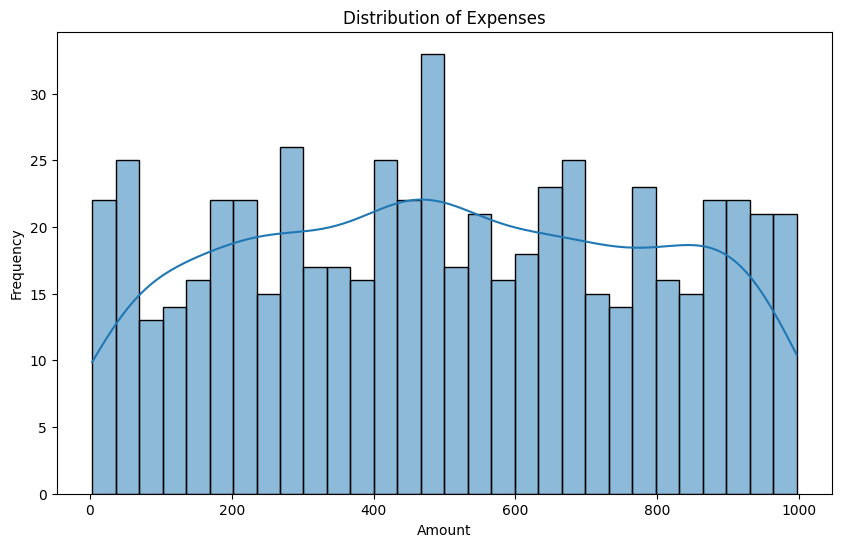

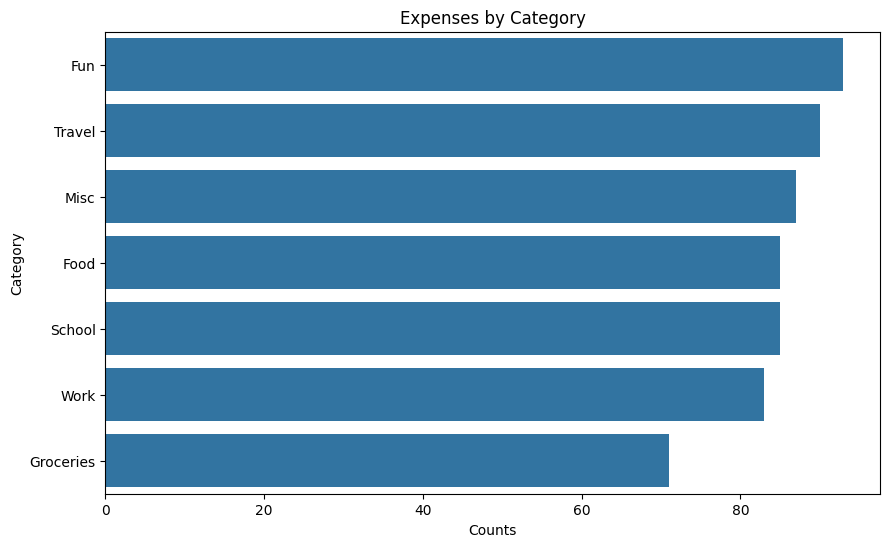

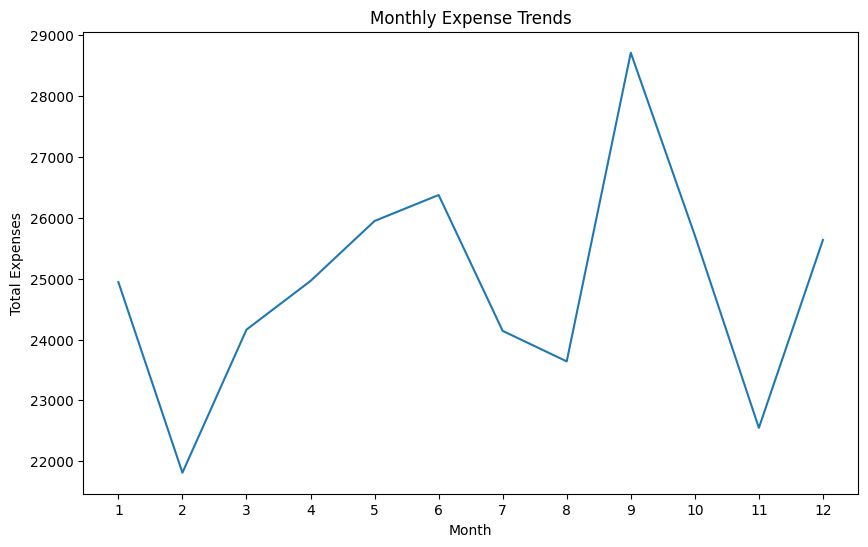

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
filename = 'expenses.csv'
df = pd.read_csv(filename)

# Remove invalid dates
df['Date (MM-DD-YYYY)'] = pd.to_datetime(df['Date (MM-DD-YYYY)'], errors='coerce')  # Invalid dates become NaT
df = df.dropna(subset=['Date (MM-DD-YYYY)'])  # Remove rows with NaT in the date column

# Exploratory Data Analysis
# Descriptive Statistics
print(df.describe())

# Distribution of Expenses
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Distribution of Expenses')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Expenses by Category
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Expenses by Category')
plt.xlabel('Counts')
plt.ylabel('Category')
plt.show()

# Monthly Expense Trends
df['Month'] = df['Date (MM-DD-YYYY)'].dt.month
monthly_expenses = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_expenses.index, y=monthly_expenses.values)
plt.title('Monthly Expense Trends')
plt.xlabel('Month')
plt.ylabel('Total Expenses')
plt.xticks(range(1, 13))
plt.show()


In [14]:
# Display unique values in the date column to identify potential format issues
unique_dates = df['Date (MM-DD-YYYY)'].unique()
print(unique_dates)


['2024-12-07' '2024-12-17' '2024-12-30' '2024-12-26' '2024-12-25'
 '2024-12-18' '2024-12-22' '2024-12-01' '2024-12-23' '2024-12-19'
 '2024-12-14' '2024-12-13' '2024-12-29' '2024-12-21' '2024-12-10'
 '2024-12-02' '2024-12-03' '2024-12-04' '2024-12-09' '2024-12-20'
 '2024-12-11' '2024-12-27' '2024-12-06' '2024-12-28' '2024-12-24'
 '2024-12-08' '2024-12-12' '2024-12-05' '2024-12-16' '2024-12-31'
 '2024-07-02' '2024-07-13' '2024-07-03' '2024-07-05' '2024-07-31'
 '2024-07-27' '2024-07-11' '2024-07-12' '2024-07-14' '2024-07-17'
 '2024-07-25' '2024-07-21' '2024-07-28' '2024-07-09' '2024-07-01'
 '2024-07-08' '2024-07-18' '2024-07-24' '2024-07-06' '2024-07-29'
 '2024-07-10' '2024-07-04' '2024-07-23' '2024-07-26' '2024-07-16'
 '2024-07-19' '2024-07-15' '2024-07-20' '2024-07-07' '2024-07-30'
 '2024-01-23' '2024-01-17' '2024-01-11' '2024-01-04' '2024-01-08'
 '2024-01-21' '2024-01-15' '2024-01-02' '2024-01-01' '2024-01-03'
 '2024-01-19' '2024-01-24' '2024-01-30' '2024-01-14' '2024-01-29'
 '2024-01-

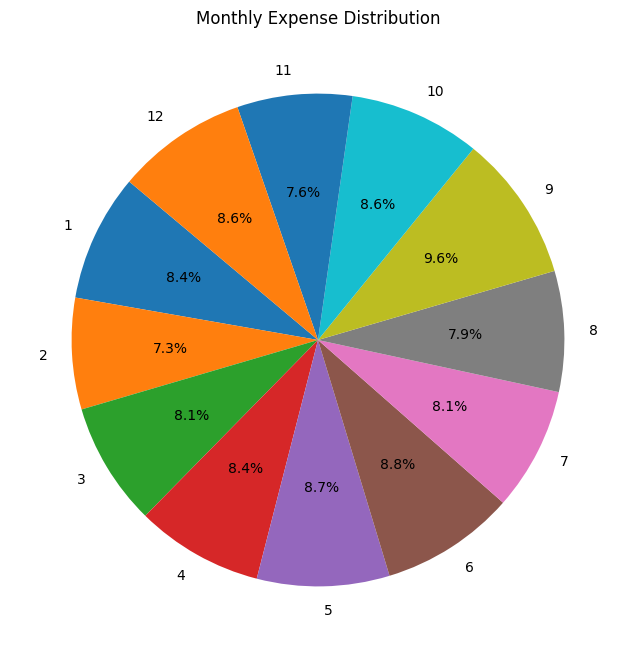

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Re-import the CSV file and convert the date column
filename = 'expenses.csv'
df = pd.read_csv(filename)
df['Date (MM-DD-YYYY)'] = pd.to_datetime(df['Date (MM-DD-YYYY)'], errors='coerce')
df.dropna(subset=['Date (MM-DD-YYYY)'], inplace=True)  # Remove any rows with invalid dates

# Calculating total expenses per month
monthly_totals = df.groupby(df['Date (MM-DD-YYYY)'].dt.month)['Amount'].sum()
monthly_percentages = (monthly_totals / monthly_totals.sum()) * 100

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(monthly_percentages, labels=monthly_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Monthly Expense Distribution')
plt.show()


/var/folders/2f/bp_vn6cj3s93_c6z6vkcgwjh0000gn/T/com.apple.messages/ipykernel_13313/743193747.py:20: FutureWarning: The provided callable <function sum at 0x7fb058ec6b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  heatmap_data = pd.pivot_table(df, values='Amount', index='Day', columns='Month', aggfunc=np.sum)


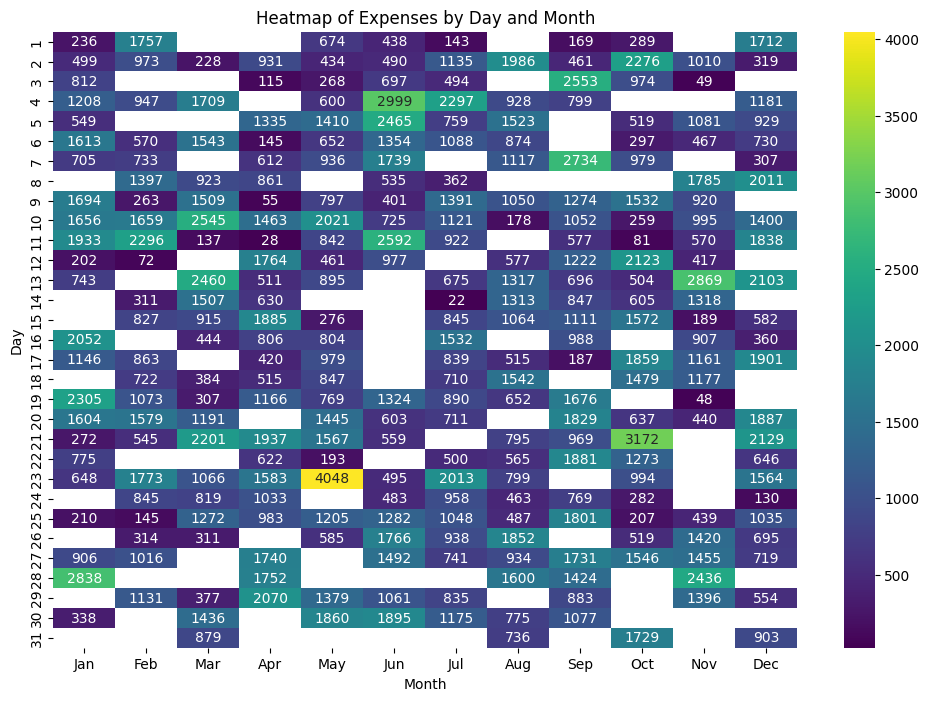

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import calendar

# Re-importing the CSV file
filename = 'expenses.csv'  # Replace with your actual file path
df = pd.read_csv(filename)

# Convert date from string to datetime
df['Date (MM-DD-YYYY)'] = pd.to_datetime(df['Date (MM-DD-YYYY)'], errors='coerce')
df.dropna(subset=['Date (MM-DD-YYYY)'], inplace=True)

# Extracting month and day
df['Month'] = df['Date (MM-DD-YYYY)'].dt.month
df['Day'] = df['Date (MM-DD-YYYY)'].dt.day

# Creating a pivot table for the heatmap
heatmap_data = pd.pivot_table(df, values='Amount', index='Day', columns='Month', aggfunc=np.sum)

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.0f')
plt.title('Heatmap of Expenses by Day and Month')
plt.xlabel('Month')
plt.ylabel('Day')
plt.xticks(np.arange(0.5, len(heatmap_data.columns), 1), calendar.month_abbr[1:13])
plt.show()


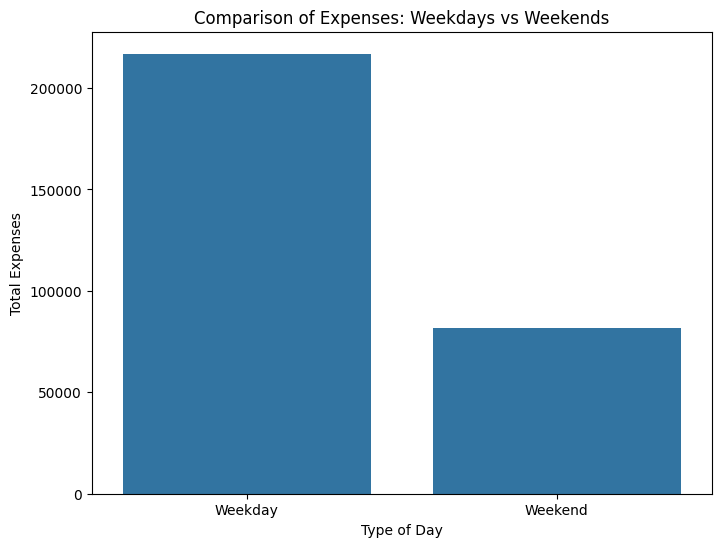

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
filename = 'expenses.csv'  # Replace with your actual file path
df = pd.read_csv(filename)

# Convert date from string to datetime
df['Date'] = pd.to_datetime(df['Date (MM-DD-YYYY)'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)

# Identify weekdays and weekends
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['WeekdayOrWeekend'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Aggregate expenses
expenses_weekday_weekend = df.groupby('WeekdayOrWeekend')['Amount'].sum()

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=expenses_weekday_weekend.index, y=expenses_weekday_weekend.values)
plt.title('Comparison of Expenses: Weekdays vs Weekends')
plt.xlabel('Type of Day')
plt.ylabel('Total Expenses')
plt.show()

